In [189]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

### Importing the data

In [190]:
data = pd.read_csv("train.csv")
test = pd.read_csv("x_test.csv")
data.head()

,Unnamed: 0,Completion_rate,Tuition_in_state,Tuition_out_state,Faculty_salary,Pell_grant_rate,SAT_average,ACT_50thPercentile,pct_White,pct_Black,pct_Hispanic,pct_Asian,Parents_middlesch,Parents_highsch,Parents_college
0,0,0.6552,33560.0,33560.0,4285.0,0.2531,1029.0,21.0,0.3771,0.0612,0.0590,0.1345,0.011561,0.226397,0.762042
1,1,0.5246,7383.0,18543.0,9148.0,0.4752,963.0,21.0,0.2866,0.0331,0.4212,0.1011,0.107411,0.375165,0.517424
2,2,0.4030,23144.0,23144.0,7232.0,0.4668,984.0,21.0,0.3085,0.1426,0.2309,0.0149,0.091241,0.361314,0.547445
3,3,0.5472,6610.0,17770.0,9284.0,0.6369,877.0,18.0,0.1272,0.0572,0.6282,0.0557,0.163236,0.433621,0.403142
4,4,0.8166,47004.0,47004.0,11984.0,0.1337,1323.0,30.0,0.4251,0.0786,0.2268,0.0549,0.014868,0.186091,0.799041


In [191]:
print(data.info(), test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2364 entries, 0 to 2363
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          2364 non-null   int64  
 1   Completion_rate     2364 non-null   float64
 2   Tuition_in_state    2364 non-null   float64
 3   Tuition_out_state   2364 non-null   float64
 4   Faculty_salary      2364 non-null   float64
 5   Pell_grant_rate     2364 non-null   float64
 6   SAT_average         2364 non-null   float64
 7   ACT_50thPercentile  2364 non-null   float64
 8   pct_White           2364 non-null   float64
 9   pct_Black           2364 non-null   float64
 10  pct_Hispanic        2364 non-null   float64
 11  pct_Asian           2364 non-null   float64
 12  Parents_middlesch   2364 non-null   float64
 13  Parents_highsch     2364 non-null   float64
 14  Parents_college     2364 non-null   float64
dtypes: float64(14), int64(1)
memory usage: 277.2 KB
<class 

The records of completion rates of schools are presented in tabular format with each row representing a unique school in a specific year from 2013-2016 (inclusive). Each record has 14 columns as follows:

* Completion rate for first-time, full-time students at four-year institutions (150% of expected time to completion)
* In-state tuition and fees
* Out-of-state tuition and fees
* Average faculty salary
* Percentage of undergraduates who receive a Pell Grant
* Average SAT equivalent score of students admitted
* Midpoint of the ACT cumulative score
* Total share of enrollment of undergraduate degree-seeking students who are white
* Total share of enrollment of undergraduate degree-seeking students who are black
* Total share of enrollment of undergraduate degree-seeking students who are Hispanic
* Total share of enrollment of undergraduate degree-seeking students who are Asian
* Percent of students whose parents' highest educational level is middle school
* Percent of students whose parents' highest educational level is high school
* Percent of students whose parents' highest educational level is some form of post-secondary education

In [192]:
from sklearn.model_selection import train_test_split 
train, valid = train_test_split(data, test_size=0.2, random_state=42)

train_x = train.drop(['Unnamed: 0','Completion_rate'], axis=1)
train_y = train["Completion_rate"]
valid_x = valid.drop(['Unnamed: 0','Completion_rate'], axis=1)
valid_y = valid["Completion_rate"]
test_x = test.drop('Unnamed: 0', axis=1)

In [193]:
train_x.describe()

,Tuition_in_state,Tuition_out_state,Faculty_salary,Pell_grant_rate,SAT_average,ACT_50thPercentile,pct_White,pct_Black,pct_Hispanic,pct_Asian,Parents_middlesch,Parents_highsch,Parents_college
count,1891.000000,1891.000000,1891.000000,1891.000000,1891.000000,1891.000000,1891.000000,1891.000000,1891.000000,1891.000000,1891.000000,1891.000000,1891.000000
mean,19851.636171,25245.509783,7932.060814,0.370637,1054.628768,23.077208,0.580350,0.146128,0.106315,0.045861,0.028632,0.304458,0.666910
std,12876.631470,9739.500766,2233.685775,0.142333,133.725331,3.442861,0.218804,0.197314,0.118262,0.062040,0.021761,0.081720,0.093000
min,480.000000,480.000000,3186.000000,0.083300,708.000000,14.000000,0.000000,0.000000,0.000000,0.000000,0.002952,0.075059,0.384661
25%,8077.000000,17774.000000,6386.500000,0.272850,971.500000,21.000000,0.478550,0.044150,0.036050,0.010500,0.015251,0.252936,0.602573
50%,15648.000000,23887.000000,7466.000000,0.357800,1035.000000,23.000000,0.627200,0.076900,0.067400,0.022000,0.022952,0.314947,0.657797
75%,29326.500000,30858.000000,9069.000000,0.447700,1114.000000,25.000000,0.744650,0.158150,0.127000,0.055050,0.034758,0.365037,0.727947
max,53649.000000,53649.000000,17555.000000,0.996300,1519.000000,34.000000,0.962000,1.000000,0.948700,0.437100,0.201153,0.508948,0.915559


In [194]:
valid_x.describe()

,Tuition_in_state,Tuition_out_state,Faculty_salary,Pell_grant_rate,SAT_average,ACT_50thPercentile,pct_White,pct_Black,pct_Hispanic,pct_Asian,Parents_middlesch,Parents_highsch,Parents_college
count,473.000000,473.000000,473.000000,473.000000,473.000000,473.000000,473.000000,473.000000,473.000000,473.000000,473.000000,473.000000,473.000000
mean,19388.723044,25242.200846,8142.103594,0.368420,1059.247357,23.192389,0.582724,0.149845,0.106429,0.046877,0.028158,0.301813,0.670028
std,12874.258672,9529.986100,2356.213954,0.143931,131.713641,3.419006,0.221484,0.202075,0.119616,0.065429,0.021366,0.077965,0.088992
min,3276.000000,5000.000000,3436.000000,0.091600,712.000000,14.000000,0.000400,0.004800,0.003500,0.000000,0.003648,0.086860,0.399471
25%,8282.000000,17890.000000,6548.000000,0.267500,977.000000,21.000000,0.472800,0.046500,0.034900,0.011200,0.015309,0.246418,0.604635
50%,13360.000000,23654.000000,7728.000000,0.355800,1047.000000,23.000000,0.640800,0.076100,0.064100,0.021300,0.021991,0.314747,0.661304
75%,29048.000000,30459.000000,9217.000000,0.442100,1126.000000,25.000000,0.740300,0.152100,0.129400,0.049400,0.034667,0.362401,0.733000
max,55056.000000,55056.000000,22146.000000,0.928400,1501.000000,34.000000,0.961100,0.986200,0.915000,0.407100,0.178321,0.501561,0.899777


In [195]:
test_x.describe()

,Tuition_in_state,Tuition_out_state,Faculty_salary,Pell_grant_rate,SAT_average,ACT_50thPercentile,pct_White,pct_Black,pct_Hispanic,pct_Asian,Parents_middlesch,Parents_highsch,Parents_college
count,1165.000000,1165.000000,1165.000000,1165.000000,1165.000000,1165.000000,1165.000000,1165.000000,1165.000000,1165.000000,1165.000000,1165.000000,1165.000000
mean,19988.272103,25261.595708,7964.805150,0.374047,1053.993991,23.020601,0.574448,0.151167,0.107776,0.046033,0.028493,0.305455,0.666052
std,12920.171345,9691.344746,2297.951761,0.142069,132.464503,3.415085,0.225165,0.197124,0.120402,0.062028,0.020916,0.080206,0.090689
min,580.000000,580.000000,1451.000000,0.111600,666.000000,14.000000,0.000000,0.000000,0.000000,0.000000,0.003002,0.077670,0.428961
25%,8074.000000,17856.000000,6405.000000,0.276700,970.000000,21.000000,0.465100,0.045300,0.035900,0.010200,0.015144,0.253322,0.602740
50%,16478.000000,24109.000000,7552.000000,0.358800,1035.000000,23.000000,0.621400,0.077900,0.064900,0.021200,0.022879,0.316508,0.657465
75%,29090.000000,30630.000000,9020.000000,0.458800,1109.000000,25.000000,0.749600,0.162500,0.131400,0.052900,0.035018,0.363222,0.725784
max,53090.000000,53090.000000,21354.000000,0.950100,1506.000000,34.000000,0.919800,0.989500,0.947100,0.404200,0.162921,0.502919,0.911003


### Checking for linearity

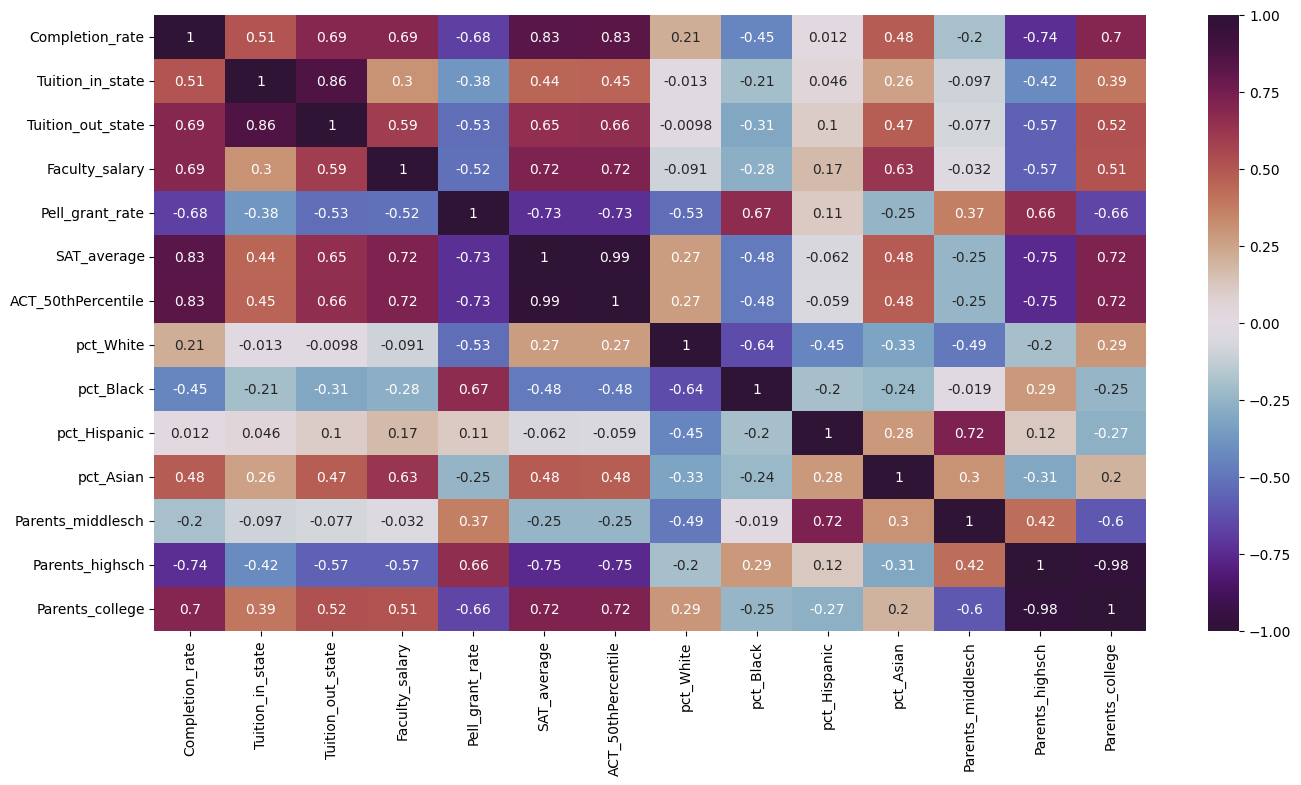

In [196]:
corr_matrix = train.drop('Unnamed: 0', axis=1).corr()
plt.figure(figsize=(16,8))
sns.heatmap(corr_matrix, cmap='twilight_shifted', vmin=-1.0, vmax=1.0, annot=True)
plt.show()

We are looking at two main things here:

    1. some pairs of features have extremely high correlation coefficients between them. [see SAT_average with ACT_50thPercentile or Parents_highsch with Parents_college] This suggests the likelihood of multicollinearity that we will deal with in the next section.

    2. some features have extremely low linear correlation with respect to Completion_rate. [see pct_Hispanic with 0.012 correlation coefficient] For these features we can consider either dropping them entirely, or attempting to find a transformation that will boost our linear correlation. In order to do this we first filter them out and them plot them individually to get some intuition about their functional relationship.

In [197]:
weak_corr_features = list(corr_matrix[corr_matrix['Completion_rate'].abs() < 0.5].index)
print(weak_corr_features)


['pct_White', 'pct_Black', 'pct_Hispanic', 'pct_Asian', 'Parents_middlesch']


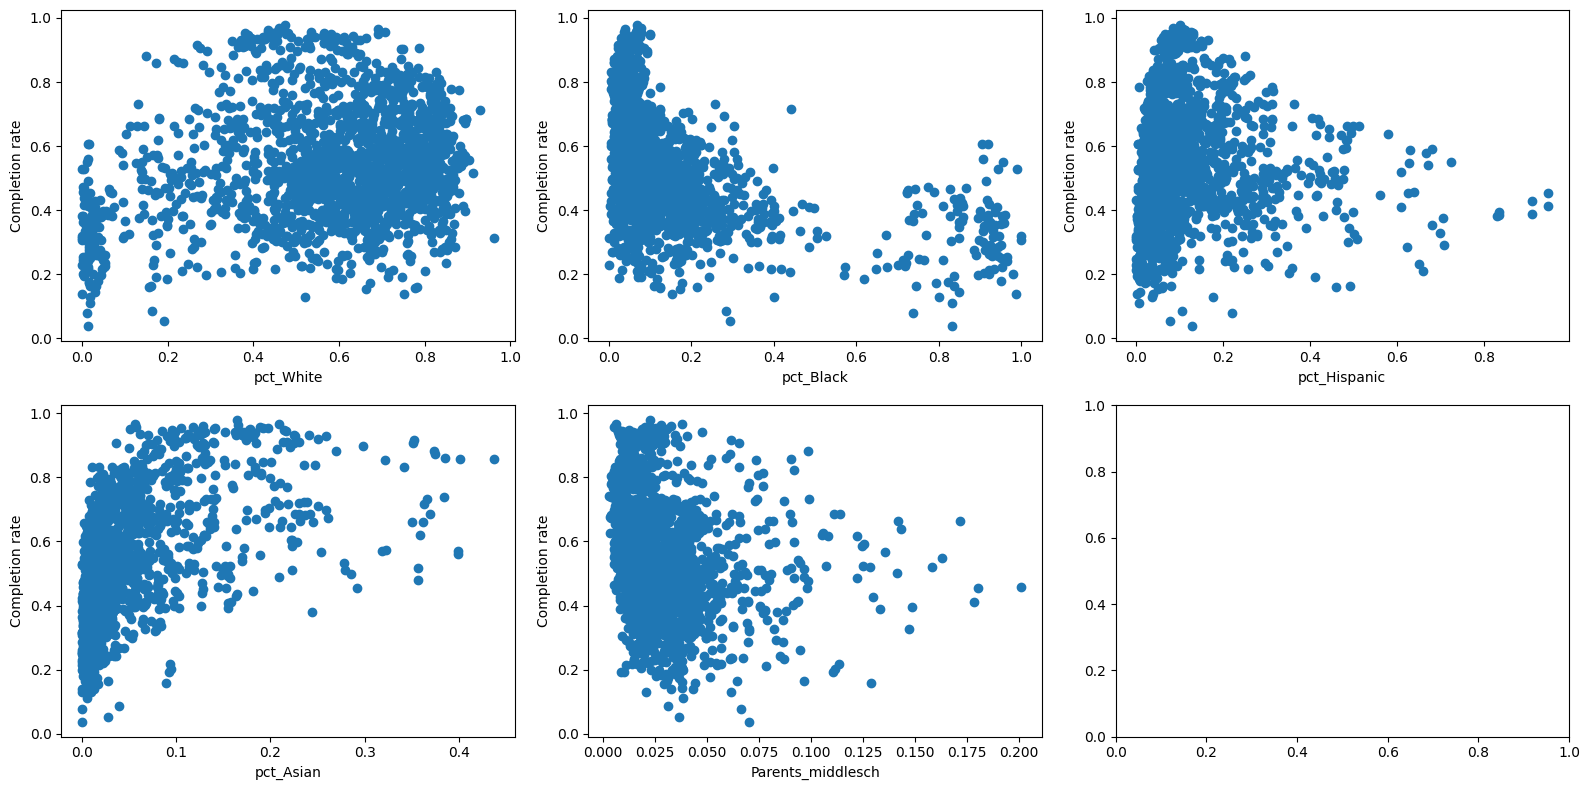

In [198]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(16, 8))

for i, feature in enumerate(weak_corr_features):
    row = i // 3
    col = i % 3
    axes[row, col].scatter(train[feature], train['Completion_rate'])
    axes[row, col].set_xlabel(feature)
    axes[row, col].set_ylabel('Completion rate')

plt.tight_layout()
plt.show()

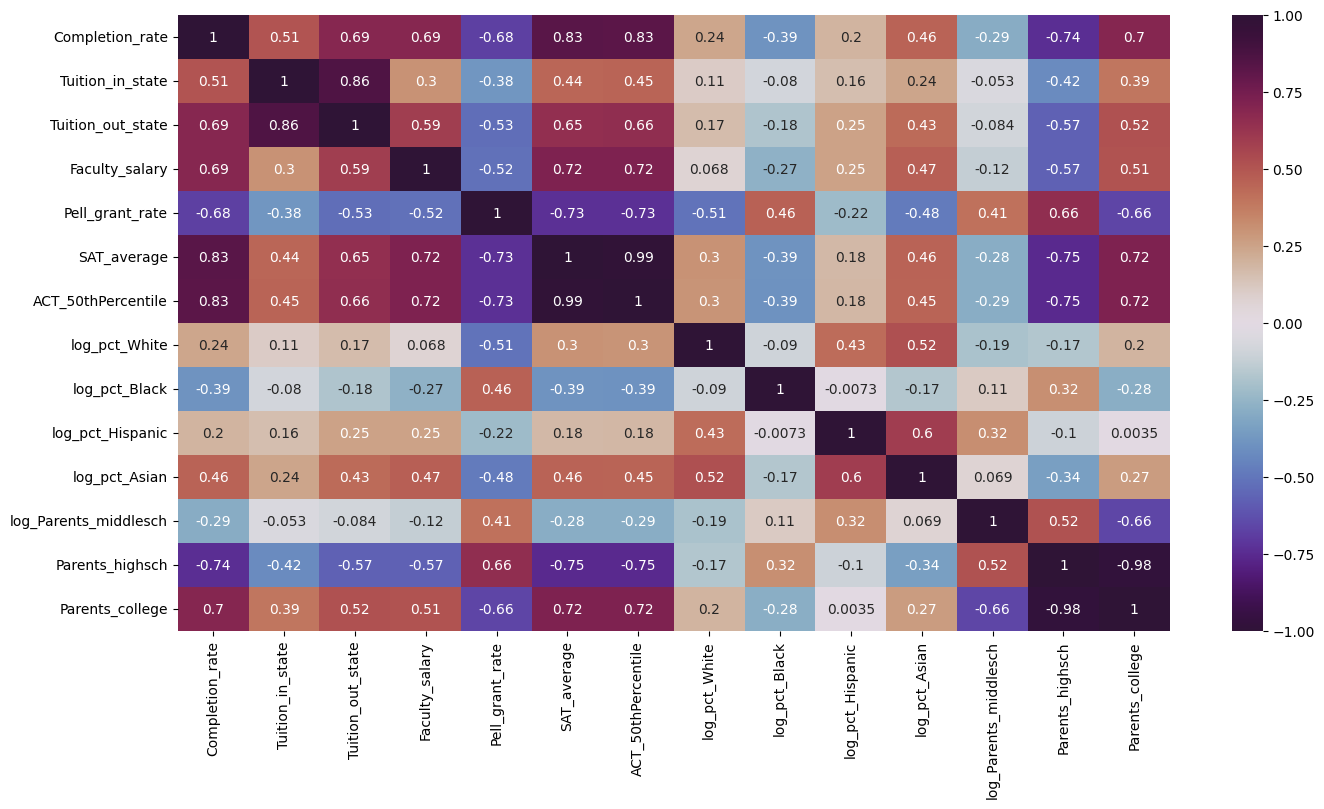

In [199]:
# Trying logarithmic transformation
log_features = train.loc[:,:].drop('Unnamed: 0', axis=1)
log_features[weak_corr_features] = log_features[weak_corr_features].apply(lambda x: np.log(x+1e-9))  # NOTE: log-shifted to avoid errors
for feature in weak_corr_features:
    log_features.rename(columns={feature: 'log_'+feature}, inplace=True)

log_corr_mat = log_features.corr()
plt.figure(figsize=(16,8))
sns.heatmap(log_corr_mat, cmap='twilight_shifted', vmin=-1.0, vmax=1.0, annot=True)
plt.show()


NOTE: we have managed to boost the linear correlation coefficients for these features, but not significantly so. We will accept the transformation but will also have to consider using a model that can handle nonlinear relationships between our independent and dependent variables.

In [200]:
train_x = log_features.drop('Completion_rate', axis=1)

# Do all the same preparation on the validation and test data...
valid_x[weak_corr_features] = valid_x[weak_corr_features].apply(lambda x: np.log(x+1e-9))
for feature in weak_corr_features:
    valid_x.rename(columns={feature: 'log_'+feature}, inplace=True)

test_x[weak_corr_features] = test_x[weak_corr_features].apply(lambda x: np.log(x+1e-9))
for feature in weak_corr_features:
    test_x.rename(columns={feature: 'log_'+feature}, inplace=True)


In [201]:
# What our training data looks like now...
train_x

,Tuition_in_state,Tuition_out_state,Faculty_salary,Pell_grant_rate,SAT_average,ACT_50thPercentile,log_pct_White,log_pct_Black,log_pct_Hispanic,log_pct_Asian,log_Parents_middlesch,Parents_highsch,Parents_college
2279,6775.0,17935.0,8122.0,0.5843,901.0,19.0,-1.629641,-2.724180,-0.697356,-2.733368,-1.907455,0.408475,0.443067
1894,12097.0,26146.0,11296.0,0.2989,1132.0,25.0,-0.413699,-2.803460,-2.412400,-2.458070,-3.464376,0.300292,0.668416
1480,34545.0,34545.0,7284.0,0.3352,998.0,22.0,-0.309928,-2.175952,-3.064011,-4.500810,-4.466865,0.266029,0.722488
480,7294.0,13954.0,5797.0,0.5088,1090.0,24.0,-0.236229,-2.312635,-2.821779,-4.866535,-4.080499,0.326151,0.656950
2020,11830.0,11830.0,6539.0,0.3595,884.0,19.0,-0.744862,-1.942117,-1.601470,-2.878839,-3.153531,0.375372,0.581927
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1638,40265.0,40265.0,10098.0,0.1923,1202.0,27.0,-0.714575,-2.877061,-1.509593,-2.258568,-3.804685,0.178130,0.799604
1095,6392.0,20420.0,7830.0,0.2899,1145.0,24.0,-0.230672,-3.011862,-2.725705,-3.877622,-4.412615,0.223181,0.764695
1130,8496.0,12744.0,6605.0,0.3544,1066.0,23.0,-0.126584,-3.244194,-4.074542,-5.360193,-3.609952,0.387118,0.585829
1294,13527.0,38235.0,12265.0,0.5680,1119.0,26.0,-2.024196,-3.174859,-1.014179,-1.003757,-2.313848,0.341291,0.559829


### Checking for multicollinearity

In [202]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def vif(df):
    VIF_Scores = pd.DataFrame()
    VIF_Scores["Independent Features"] = df.columns
    VIF_Scores["VIF Scores"] = [variance_inflation_factor(df.values,i) for i in range(df.shape[1])]
    return VIF_Scores

vif(train_x)


,Independent Features,VIF Scores
0,Tuition_in_state,17.962474
1,Tuition_out_state,61.470748
2,Faculty_salary,43.352676
3,Pell_grant_rate,27.167968
4,SAT_average,2365.013336
5,ACT_50thPercentile,1727.584932
6,log_pct_White,3.286941
7,log_pct_Black,7.627192
8,log_pct_Hispanic,9.234868
9,log_pct_Asian,11.505208


In [203]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
temp_df = pd.DataFrame(scaler.fit_transform(train_x), columns=train_x.columns)
temp_df['Avg_tuition_in/out_state'] = temp_df.apply(lambda x: (x['Tuition_in_state'] + x['Tuition_out_state'])/2, axis=1)
temp_df = temp_df.drop(['Tuition_in_state','Tuition_out_state','Parents_highsch','ACT_50thPercentile'], axis=1)

vif(temp_df)

,Independent Features,VIF Scores
0,Faculty_salary,2.660929
1,Pell_grant_rate,3.659838
2,SAT_average,4.627088
3,log_pct_White,2.387493
4,log_pct_Black,1.402911
5,log_pct_Hispanic,2.054026
6,log_pct_Asian,2.381695
7,log_Parents_middlesch,3.118199
8,Parents_college,4.657314
9,Avg_tuition_in/out_state,1.689405


In [204]:
# Update our test_x, train_x with the tested transformations
train_x = pd.DataFrame(scaler.fit_transform(train_x), columns=train_x.columns)
train_x['Avg_tuition_in/out_state'] = train_x.apply(lambda x: (x['Tuition_in_state'] + x['Tuition_out_state'])/2, axis=1)
train_x = train_x.drop(['Tuition_in_state','Tuition_out_state','Parents_highsch','ACT_50thPercentile'], axis=1)

valid_x = pd.DataFrame(scaler.fit_transform(valid_x), columns=valid_x.columns)
valid_x['Avg_tuition_in/out_state'] = valid_x.apply(lambda x: (x['Tuition_in_state'] + x['Tuition_out_state'])/2, axis=1)
valid_x = valid_x.drop(['Tuition_in_state','Tuition_out_state','Parents_highsch','ACT_50thPercentile'], axis=1)

test_x = pd.DataFrame(scaler.fit_transform(test_x), columns=test_x.columns)
test_x['Avg_tuition_in/out_state'] = test_x.apply(lambda x: (x['Tuition_in_state'] + x['Tuition_out_state'])/2, axis=1)
test_x = test_x.drop(['Tuition_in_state','Tuition_out_state','Parents_highsch','ACT_50thPercentile'], axis=1)


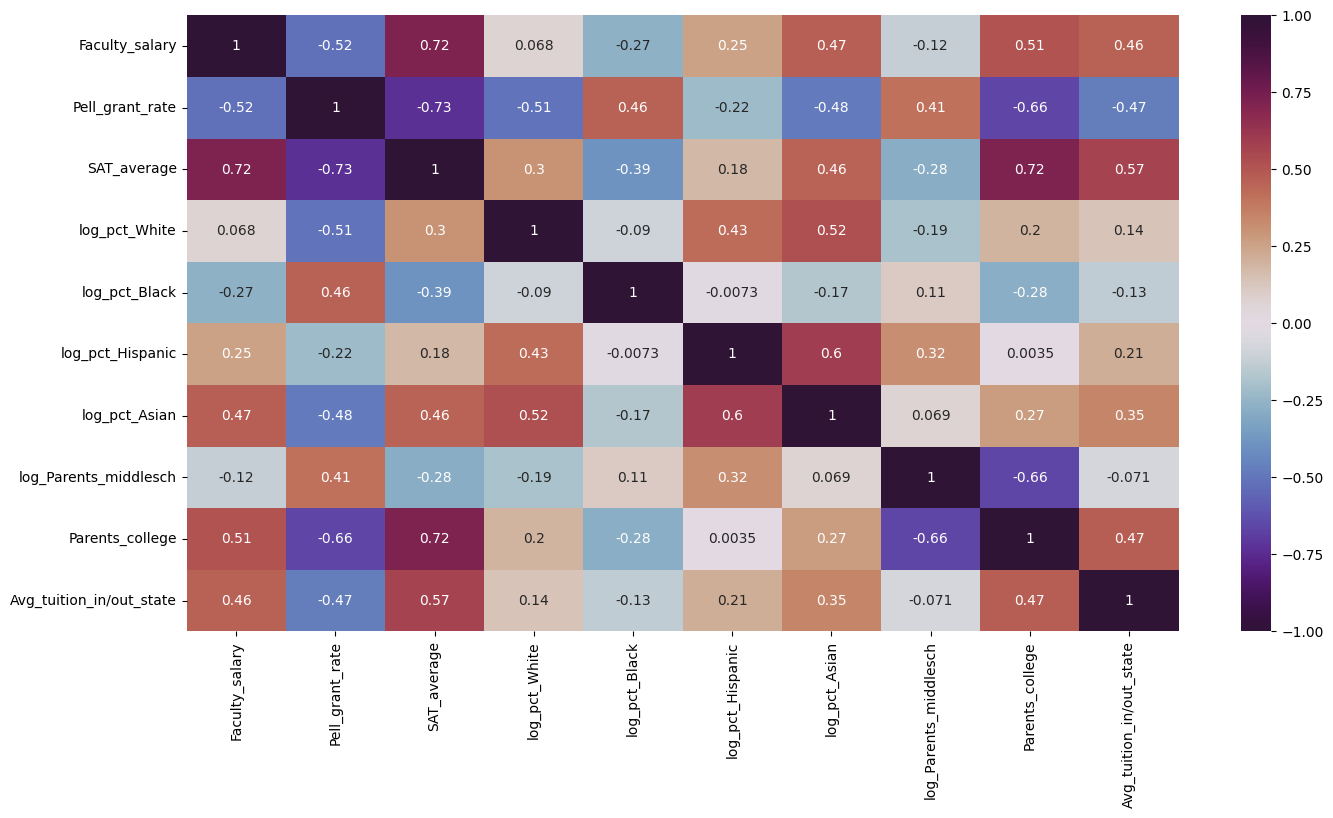

In [209]:
corr_matrix = train_x.corr()
plt.figure(figsize=(16,8))
sns.heatmap(corr_matrix, cmap='twilight_shifted', vmin=-1.0, vmax=1.0, annot=True)
plt.show()

## Correlation matrix after corrections thusfar...

### Creating a simple regression model

In [206]:
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, GradientBoostingRegressor
from sklearn.metrics import r2_score

lr = LinearRegression()
ridge = Ridge()
rfr = RandomForestRegressor()
etr = ExtraTreesRegressor()
gbr = GradientBoostingRegressor()

lr.fit(train_x,train_y)
ridge.fit(train_x,train_y)
rfr.fit(train_x,train_y)
etr.fit(train_x,train_y)
gbr.fit(train_x,train_y)


GradientBoostingRegressor()

In [218]:
model = rfr
print('Training: ', r2_score(model.predict(train_x), train_y), '\nValidation: ', r2_score(model.predict(valid_x), valid_y))

Training:  0.9768710615873754 
Validation:  0.8086022796787431


In [216]:
y_pred = model.predict(test_x)
print(y_pred)

[0.480587 0.456573 0.489037 ... 0.558726 0.57362  0.647111]


### Creating our submission

In [105]:
submission = pd.DataFrame.from_dict({'Completion_rate': y_pred})
submission

,Completion_rate
0,0.452681
1,0.459778
2,0.466755
3,0.434947
4,0.451822
...,...
1160,0.483664
1161,0.491142
1162,0.560284
1163,0.534042


In [9]:
submission.to_csv('submission.csv', index = True, index_label = "id") 

### To submit your submission

On the panel on your right, select the drop down "Submit to competition", and submit this notebook. Ensure that your submission is named ```submission.csv```!